<a href="https://colab.research.google.com/github/PulkitKhator/Apriori-Algorithm/blob/main/The_Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
!pip install apyori
from apyori import apriori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=50afdbc3b640eeff43cb11cc1700824df7415405af91c52db02469866eaa92aa
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
data = pd.read_csv('data10Nov.csv')
data

,user_pseudo_id,ITEM_LIST
0,311346c6c1272ce279087423746fbd8a,"ID:18, Qty:1, 9.0ID:58, Qty:1, 11.5"
1,94AA2C5C1A064BF6AAC28814EDC8C08C,"id:210,Qt:1,107.0,"
2,6af1d538a9cf16a9de7290680b76be42,"ID:2174, Qty:1, 59.0"
3,6619fe18732bd932b2d42e7214e7340a,"ID:7777324, Qty:1, 27.0"
4,49c2d85a17213a30e26b71c8a5d63d22,"ID:2174, Qty:1, 59.0"
...,...,...
3944,619ee47ed32e3f5b5985ecebf2702e95,"ID:2314, Qty:1, 69.0"
3945,13d3dfc206d5c0ab392cd4712a0bba27,"ID:2174, Qty:1, 59.0"
3946,bb993e0f9ecf0055bd5575e051fee15b,"ID:21, Qty:1, 18.0"
3947,5ef9e689ba94d5f4e8b19480fe26bfc6,"ID:2314, Qty:1, 69.0"


In [ ]:
data.isna().sum()

user_pseudo_id     0
ITEM_LIST         28
dtype: int64

In [ ]:
data.dropna(subset = ['ITEM_LIST'],axis = 0,inplace = True)
data

,user_pseudo_id,ITEM_LIST
0,311346c6c1272ce279087423746fbd8a,"ID:18, Qty:1, 9.0ID:58, Qty:1, 11.5"
1,94AA2C5C1A064BF6AAC28814EDC8C08C,"id:210,Qt:1,107.0,"
2,6af1d538a9cf16a9de7290680b76be42,"ID:2174, Qty:1, 59.0"
3,6619fe18732bd932b2d42e7214e7340a,"ID:7777324, Qty:1, 27.0"
4,49c2d85a17213a30e26b71c8a5d63d22,"ID:2174, Qty:1, 59.0"
...,...,...
3944,619ee47ed32e3f5b5985ecebf2702e95,"ID:2314, Qty:1, 69.0"
3945,13d3dfc206d5c0ab392cd4712a0bba27,"ID:2174, Qty:1, 59.0"
3946,bb993e0f9ecf0055bd5575e051fee15b,"ID:21, Qty:1, 18.0"
3947,5ef9e689ba94d5f4e8b19480fe26bfc6,"ID:2314, Qty:1, 69.0"


In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data['ITEM_LIST'] = data['ITEM_LIST'].str.replace('id:','D:').str.replace('ID:','D:')
data

,user_pseudo_id,ITEM_LIST
0,311346c6c1272ce279087423746fbd8a,"D:18, Qty:1, 9.0D:58, Qty:1, 11.5"
1,94AA2C5C1A064BF6AAC28814EDC8C08C,"D:210,Qt:1,107.0,"
2,6af1d538a9cf16a9de7290680b76be42,"D:2174, Qty:1, 59.0"
3,6619fe18732bd932b2d42e7214e7340a,"D:7777324, Qty:1, 27.0"
4,49c2d85a17213a30e26b71c8a5d63d22,"D:2174, Qty:1, 59.0"
...,...,...
3916,619ee47ed32e3f5b5985ecebf2702e95,"D:2314, Qty:1, 69.0"
3917,13d3dfc206d5c0ab392cd4712a0bba27,"D:2174, Qty:1, 59.0"
3918,bb993e0f9ecf0055bd5575e051fee15b,"D:21, Qty:1, 18.0"
3919,5ef9e689ba94d5f4e8b19480fe26bfc6,"D:2314, Qty:1, 69.0"


In [ ]:
data["Extract_ITEM_LIST"]= data["ITEM_LIST"].str.findall(pat = '(D:.*?,)')
data

,user_pseudo_id,ITEM_LIST,Extract_ITEM_LIST
0,311346c6c1272ce279087423746fbd8a,"D:18, Qty:1, 9.0D:58, Qty:1, 11.5","[D:18,, D:58,]"
1,94AA2C5C1A064BF6AAC28814EDC8C08C,"D:210,Qt:1,107.0,","[D:210,]"
2,6af1d538a9cf16a9de7290680b76be42,"D:2174, Qty:1, 59.0","[D:2174,]"
3,6619fe18732bd932b2d42e7214e7340a,"D:7777324, Qty:1, 27.0","[D:7777324,]"
4,49c2d85a17213a30e26b71c8a5d63d22,"D:2174, Qty:1, 59.0","[D:2174,]"
...,...,...,...
3916,619ee47ed32e3f5b5985ecebf2702e95,"D:2314, Qty:1, 69.0","[D:2314,]"
3917,13d3dfc206d5c0ab392cd4712a0bba27,"D:2174, Qty:1, 59.0","[D:2174,]"
3918,bb993e0f9ecf0055bd5575e051fee15b,"D:21, Qty:1, 18.0","[D:21,]"
3919,5ef9e689ba94d5f4e8b19480fe26bfc6,"D:2314, Qty:1, 69.0","[D:2314,]"


In [ ]:
max_len = 6
for i in range(len(data)):
  data['Extract_ITEM_LIST'][i] = data['Extract_ITEM_LIST'][i] + ([float(np.nan)]*(max_len-len(data['Extract_ITEM_LIST'][i])))

In [ ]:
data

,user_pseudo_id,ITEM_LIST,Extract_ITEM_LIST
0,311346c6c1272ce279087423746fbd8a,"D:18, Qty:1, 9.0D:58, Qty:1, 11.5","[D:18,, D:58,, nan, nan, nan, nan]"
1,94AA2C5C1A064BF6AAC28814EDC8C08C,"D:210,Qt:1,107.0,","[D:210,, nan, nan, nan, nan, nan]"
2,6af1d538a9cf16a9de7290680b76be42,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]"
3,6619fe18732bd932b2d42e7214e7340a,"D:7777324, Qty:1, 27.0","[D:7777324,, nan, nan, nan, nan, nan]"
4,49c2d85a17213a30e26b71c8a5d63d22,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]"
...,...,...,...
3916,619ee47ed32e3f5b5985ecebf2702e95,"D:2314, Qty:1, 69.0","[D:2314,, nan, nan, nan, nan, nan]"
3917,13d3dfc206d5c0ab392cd4712a0bba27,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]"
3918,bb993e0f9ecf0055bd5575e051fee15b,"D:21, Qty:1, 18.0","[D:21,, nan, nan, nan, nan, nan]"
3919,5ef9e689ba94d5f4e8b19480fe26bfc6,"D:2314, Qty:1, 69.0","[D:2314,, nan, nan, nan, nan, nan]"


In [ ]:
for i in range(6):
    data['Item{}'.format(str(i+1))]=[k[i] if isinstance(k,list) else k for k in data['Extract_ITEM_LIST']]

data

,user_pseudo_id,ITEM_LIST,Extract_ITEM_LIST,Item1,Item2,Item3,Item4,Item5,Item6
0,311346c6c1272ce279087423746fbd8a,"D:18, Qty:1, 9.0D:58, Qty:1, 11.5","[D:18,, D:58,, nan, nan, nan, nan]","D:18,","D:58,",NaN,NaN,NaN,NaN
1,94AA2C5C1A064BF6AAC28814EDC8C08C,"D:210,Qt:1,107.0,","[D:210,, nan, nan, nan, nan, nan]","D:210,",NaN,NaN,NaN,NaN,NaN
2,6af1d538a9cf16a9de7290680b76be42,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]","D:2174,",NaN,NaN,NaN,NaN,NaN
3,6619fe18732bd932b2d42e7214e7340a,"D:7777324, Qty:1, 27.0","[D:7777324,, nan, nan, nan, nan, nan]","D:7777324,",NaN,NaN,NaN,NaN,NaN
4,49c2d85a17213a30e26b71c8a5d63d22,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]","D:2174,",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3916,619ee47ed32e3f5b5985ecebf2702e95,"D:2314, Qty:1, 69.0","[D:2314,, nan, nan, nan, nan, nan]","D:2314,",NaN,NaN,NaN,NaN,NaN
3917,13d3dfc206d5c0ab392cd4712a0bba27,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]","D:2174,",NaN,NaN,NaN,NaN,NaN
3918,bb993e0f9ecf0055bd5575e051fee15b,"D:21, Qty:1, 18.0","[D:21,, nan, nan, nan, nan, nan]","D:21,",NaN,NaN,NaN,NaN,NaN
3919,5ef9e689ba94d5f4e8b19480fe26bfc6,"D:2314, Qty:1, 69.0","[D:2314,, nan, nan, nan, nan, nan]","D:2314,",NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

user_pseudo_id       object
ITEM_LIST            object
Extract_ITEM_LIST    object
Item1                object
Item2                object
Item3                object
Item4                object
Item5                object
Item6                object
dtype: object

In [ ]:
A = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6']
for i in A:
  data[i] = data[i].str.replace('D:','').str.replace(',','')
data

,user_pseudo_id,ITEM_LIST,Extract_ITEM_LIST,Item1,Item2,Item3,Item4,Item5,Item6
0,311346c6c1272ce279087423746fbd8a,"D:18, Qty:1, 9.0D:58, Qty:1, 11.5","[D:18,, D:58,, nan, nan, nan, nan]",18,58,NaN,NaN,NaN,NaN
1,94AA2C5C1A064BF6AAC28814EDC8C08C,"D:210,Qt:1,107.0,","[D:210,, nan, nan, nan, nan, nan]",210,NaN,NaN,NaN,NaN,NaN
2,6af1d538a9cf16a9de7290680b76be42,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]",2174,NaN,NaN,NaN,NaN,NaN
3,6619fe18732bd932b2d42e7214e7340a,"D:7777324, Qty:1, 27.0","[D:7777324,, nan, nan, nan, nan, nan]",7777324,NaN,NaN,NaN,NaN,NaN
4,49c2d85a17213a30e26b71c8a5d63d22,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]",2174,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3916,619ee47ed32e3f5b5985ecebf2702e95,"D:2314, Qty:1, 69.0","[D:2314,, nan, nan, nan, nan, nan]",2314,NaN,NaN,NaN,NaN,NaN
3917,13d3dfc206d5c0ab392cd4712a0bba27,"D:2174, Qty:1, 59.0","[D:2174,, nan, nan, nan, nan, nan]",2174,NaN,NaN,NaN,NaN,NaN
3918,bb993e0f9ecf0055bd5575e051fee15b,"D:21, Qty:1, 18.0","[D:21,, nan, nan, nan, nan, nan]",21,NaN,NaN,NaN,NaN,NaN
3919,5ef9e689ba94d5f4e8b19480fe26bfc6,"D:2314, Qty:1, 69.0","[D:2314,, nan, nan, nan, nan, nan]",2314,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset = data[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6']]
dataset

,Item1,Item2,Item3,Item4,Item5,Item6
0,18,58,NaN,NaN,NaN,NaN
1,210,NaN,NaN,NaN,NaN,NaN
2,2174,NaN,NaN,NaN,NaN,NaN
3,7777324,NaN,NaN,NaN,NaN,NaN
4,2174,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3916,2314,NaN,NaN,NaN,NaN,NaN
3917,2174,NaN,NaN,NaN,NaN,NaN
3918,21,NaN,NaN,NaN,NaN,NaN
3919,2314,NaN,NaN,NaN,NaN,NaN


In [ ]:
X,_ = dataset.shape
print(X)

3921


In [ ]:
transactions = []
for i in range(0, X):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 6)])
transactions

[['18', '58', 'nan', 'nan', 'nan', 'nan'],
 ['210', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['2174', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['7777324', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['2174', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['210', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['2174', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['2839', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['2174', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['7777323', '33', 'nan', 'nan', 'nan', 'nan'],
 ['7777320', '7777320', '2378', 'nan', 'nan', 'nan'],
 ['159', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['2314', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['7777470', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['8', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['7777351', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['230', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['18', '18', 'nan', 'nan', 'nan', 'nan'],
 ['7777322', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['2839', '7', 'nan', 'nan', 'nan', 'nan'],
 ['2174', '2378', 'nan', 'nan', 'nan', 'nan'],
 ['7777323', 'nan', 'nan',

In [ ]:
rules = apriori(transactions = transactions, min_support = 0.0001, min_confidence = 0.001, min_lift = 1, min_length = 1, max_length = 1)

In [ ]:
results = list(rules)
results

[RelationRecord(items=frozenset({'159'}), support=0.01224177505738332, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'159'}), confidence=0.01224177505738332, lift=1.0)]),
 RelationRecord(items=frozenset({'178'}), support=0.007396072430502423, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'178'}), confidence=0.007396072430502423, lift=1.0)]),
 RelationRecord(items=frozenset({'18'}), support=0.05534302473858709, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'18'}), confidence=0.05534302473858709, lift=1.0)]),
 RelationRecord(items=frozenset({'19'}), support=0.03136954858454476, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'19'}), confidence=0.03136954858454476, lift=1.0)]),
 RelationRecord(items=frozenset({'2'}), support=0.0022953328232593728, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'2'}), confidence=0.0

In [ ]:
#Turning the results into a dataframe
def inspect(results):
    lhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
ProductAttachmentRate = resultsinDataFrame[resultsinDataFrame['Left Hand Side']!= 'nan'].sort_values('Support', ascending=False)
ProductAttachmentRate.reset_index(drop=True, inplace=True)
ProductAttachmentRate

,Left Hand Side,Support,Confidence,Lift
0,2174,0.248916,0.248916,1.0
1,7777440,0.084672,0.084672,1.0
2,7777320,0.067330,0.067330,1.0
3,18,0.055343,0.055343,1.0
4,7777322,0.052283,0.052283,1.0
...,...,...,...,...
65,212,0.002040,0.002040,1.0
66,41,0.001785,0.001785,1.0
67,2742,0.001530,0.001530,1.0
68,49,0.001530,0.001530,1.0


In [ ]:
# saving the dataframe
ProductAttachmentRate.to_csv('ProductAttachmentRate10NovUAE.csv', header=True, index=False)

In [ ]:
#Selecting the upsell items
SelectUpsellItem = ['2','4','5','6','7','33','37','41','45','49','51','52','53','55','58','62','65','70','75','434','435','436','2377','2378','2379','2380','2381']

In [ ]:
UpsellAttachmentRate = ProductAttachmentRate[ProductAttachmentRate['Left Hand Side'].isin(SelectUpsellItem)]
UpsellAttachmentRate.reset_index(drop=True,inplace=True)
UpsellAttachmentRate

,Left Hand Side,Support,Confidence,Lift
0,2378,0.043366,0.043366,1.0
1,55,0.040064,0.040064,1.0
2,2381,0.029148,0.029148,1.0
3,58,0.022474,0.022474,1.0
4,75,0.019867,0.019867,1.0
5,53,0.017068,0.017068,1.0
6,436,0.016512,0.016512,1.0
7,70,0.013540,0.013540,1.0
8,2377,0.008917,0.008917,1.0
9,65,0.008395,0.008395,1.0


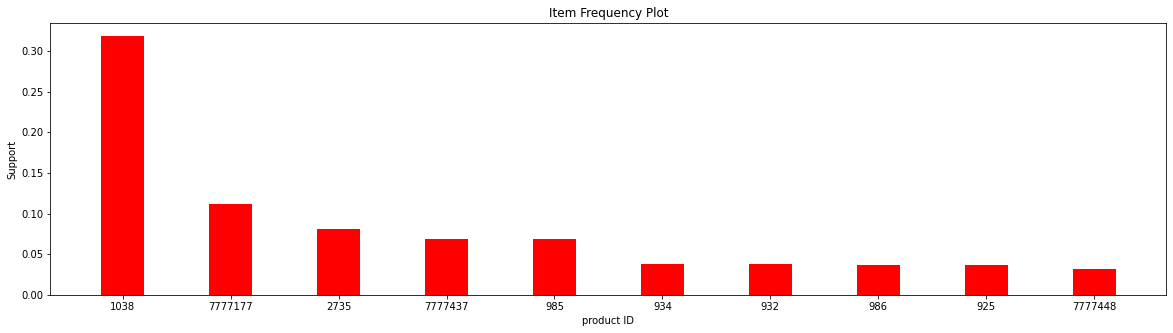

In [ ]:
#Creating the bar plot
fig = plt.figure(figsize = (20, 5))
plt.bar(ProductAttachmentRate['Left Hand Side'].tolist()[0:10], ProductAttachmentRate['Support'].tolist()[0:10], color ='red', width = 0.4)
 
plt.xlabel("product ID")
plt.ylabel("Support")
plt.title("Item Frequency Plot")
plt.show()

In [ ]:
dataset

,Item1,Item2,Item3,Item4,Item5,Item6
0,7777432,1304,NaN,NaN,NaN,NaN
1,2603,1307,NaN,NaN,NaN,NaN
2,2603,2722,NaN,NaN,NaN,NaN
3,7777223,1284,NaN,NaN,NaN,NaN
4,7777222,2804,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
75643,2603,2603,NaN,NaN,NaN,NaN
75644,2603,2603,NaN,NaN,NaN,NaN
75645,2603,2603,NaN,NaN,NaN,NaN
75646,2603,2603,NaN,NaN,NaN,NaN


In [ ]:
#Making a list of products
item1 = dataset['Item1'].tolist()
item2 = dataset['Item2'].tolist()
item3 = dataset['Item3'].tolist()
item4 = dataset['Item4'].tolist()
item5 = dataset['Item5'].tolist()
#item6 = dataset['Item6'].tolist()
ProductList = item1 + item2 + item3 + item4 + item5 + item6
ProductList = list(set(ProductList))
ProductList.remove(np.nan)
print(ProductList)
print(len(ProductList))

['1758', '7777295', '988', '2378', '992', '984', '926', '688', '728', '814', '7777407', '7777193', '7777412', '2670', '2618', '7777429', '491', '550', '2548', '1025', '456', '2063', '7777446', '621', '986', '7777189', '65', '956', '7777453', '159', '7777450', '7777432', '692', '928', '963', '935', '2440', '1412', '918', '7777195', '2611', '7777321', '7777323', '2432', '2729', '2733', '7777437', '7777185', '7777440', '2314', '1304', '2433', '2742', '7777197', '7777145', '1626', '1552', '940', '948', '7777235', '7777160', '2415', '1038', '985', '917', '925', '7777326', '7777324', '442', '7777320', '2594', '1556', '7777180', '701', '7777447', '7777166', '7777445', '675', '210', '1327', '7777411', '7777423', '446', '994', '519', '952', '2505', '2788', '700', '440', '2514', '711', '923', '2550', '2199', '2603', '2434', '6003', '7777383', '7777179', '996', '230', '944', '7777444', '995', '1017', '937', '1023', '1013', '7777126', '6022', '7777187', '7777404', '7777314', '2683', '2430', '2436'

In [ ]:
#Selecting the main items
MainProductList = [i for i in ProductList if i not in SelectUpsellItem]
print(MainProductList)
print(len(MainProductList))

['2639', '7777351', '2180', '21', '777782', '7777404', '7777323', '1751', '777772', '7777320', '73', '7777442', '7777325', '1297', '7777432', '208', '2729', '2742', '59', '7777430', '22', '1304', '7777321', '60', '777781', '210', '19', '18', '23', '212', '178', '1307', '777776', '159', '7777318', '7777414', '737', '7777415', '8', '63', '209', '2314', '2748', '230', '7777441', '2750', '7777322', '2316', '519', '7777440', '777774', '7777324', '2174']
53


In [ ]:
#Get Apriori algorithms for 1 item in cart
lhsLists = []
for k in MainProductList:
  Prod = dataset[(dataset['Item1']==k)|(dataset['Item2']==k)|(dataset['Item3']==k)|(dataset['Item4']==k)|(dataset['Item5']==k)|(dataset['Item6']==k)]
  Y,_ = Prod.shape
  transactionsProd = []
  for i in range(0, Y):
    transactionsProd.append([str(Prod.values[i,j]) for j in range(0, 6)])
  rulesProd = apriori(transactions = transactionsProd, min_support = 0.0000001, min_confidence = 0.00001, min_lift = 1, min_length = 1, max_length = 1)
  resultsProd = list(rulesProd)
  resultsinDataFrameProd = pd.DataFrame(inspect(resultsProd), columns = ['Left Hand Side', 'Support', 'Confidence', 'Lift'])
  UpsellAttachmentRateProd = resultsinDataFrameProd[resultsinDataFrameProd['Left Hand Side'].isin(SelectUpsellItem)].sort_values('Support', ascending=False)
  UpsellAttachmentRateProd.reset_index(drop=True, inplace=True)
  lhsLists.append(UpsellAttachmentRateProd['Left Hand Side'].tolist())

In [ ]:
print(lhsLists)
print(len(lhsLists))
print(len(lhsLists[0]))

[['65', '2378', '53', '58', '75'], ['55', '2381', '75', '53', '2378', '436', '58', '6', '70', '52', '2377', '5', '7', '4', '65', '45', '2379', '33', '2380', '41', '49'], ['2378', '436', '58', '55', '2381', '53', '75', '2377', '65', '2380', '4', '5', '2379', '6', '70', '52', '7', '33', '41', '45', '49', '37', '2'], ['75', '55', '65', '2378', '2381', '436', '58', '70', '53', '7', '33', '45', '2377', '52', '37', '5', '41', '4', '6', '2380', '2379', '49', '2'], ['55', '2378', '2381', '53', '75', '70', '58', '2377', '436', '33', '65', '4', '2379', '37', '7', '5', '6', '49', '45', '41', '52'], [], ['2378', '55', '2381', '53', '58', '70', '75', '436', '5', '65', '33', '6', '4', '2380', '2377', '2379', '7', '2', '52', '49', '41', '37', '45'], [], ['55', '2378', '75', '2381', '70', '53', '58', '2377', '65', '436', '5', '6', '33', '2379', '7', '52', '49', '45', '41', '4', '2380', '2'], ['2378', '55', '2381', '58', '53', '2377', '75', '70', '65', '436', '7', '6', '5', '4', '52', '2', '33', '2380'

In [ ]:
b = []
for a in range(len(lhsLists)):
  b.append(len(lhsLists[a]))
print(b)
print(len(b))

[5, 21, 23, 23, 21, 0, 23, 0, 22, 23, 16, 20, 20, 0, 0, 15, 23, 0, 22, 9, 22, 0, 23, 21, 20, 18, 23, 23, 23, 16, 20, 0, 20, 20, 21, 6, 0, 5, 23, 23, 15, 22, 23, 19, 23, 20, 23, 23, 0, 22, 20, 22, 23]
53


In [ ]:
#Increasing length to 30 by adding nans
max_len = 30
for i in range(len(lhsLists)):
  lhsLists[i] = lhsLists[i] + ([float(np.nan)]*(max_len-len(lhsLists[i])))
print(lhsLists)

[['65', '2378', '53', '58', '75', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['55', '2381', '75', '53', '2378', '436', '58', '6', '70', '52', '2377', '5', '7', '4', '65', '45', '2379', '33', '2380', '41', '49', nan, nan, nan, nan, nan, nan, nan, nan, nan], ['2378', '436', '58', '55', '2381', '53', '75', '2377', '65', '2380', '4', '5', '2379', '6', '70', '52', '7', '33', '41', '45', '49', '37', '2', nan, nan, nan, nan, nan, nan, nan], ['75', '55', '65', '2378', '2381', '436', '58', '70', '53', '7', '33', '45', '2377', '52', '37', '5', '41', '4', '6', '2380', '2379', '49', '2', nan, nan, nan, nan, nan, nan, nan], ['55', '2378', '2381', '53', '75', '70', '58', '2377', '436', '33', '65', '4', '2379', '37', '7', '5', '6', '49', '45', '41', '52', nan, nan, nan, nan, nan, nan, nan, nan, nan], [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [ ]:
#Convert your results into dataframe
df = pd.DataFrame(lhsLists, columns = ['Item{}'.format(str(i+1)) for i in range(30)])
df.insert(loc = 0, column = 'Main Product', value = MainProductList)
df

,Main Product,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20,Item21,Item22,Item23,Item24,Item25,Item26,Item27,Item28,Item29,Item30
0,2639,65,2378,53,58,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7777351,55,2381,75,53,2378,436,58,6,70,52,2377,5,7,4,65,45,2379,33,2380,41,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2180,2378,436,58,55,2381,53,75,2377,65,2380,4,5,2379,6,70,52,7,33,41,45,49,37,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,75,55,65,2378,2381,436,58,70,53,7,33,45,2377,52,37,5,41,4,6,2380,2379,49,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,777782,55,2378,2381,53,75,70,58,2377,436,33,65,4,2379,37,7,5,6,49,45,41,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7777404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7777323,2378,55,2381,53,58,70,75,436,5,65,33,6,4,2380,2377,2379,7,2,52,49,41,37,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,777772,55,2378,75,2381,70,53,58,2377,65,436,5,6,33,2379,7,52,49,45,41,4,2380,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7777320,2378,55,2381,58,53,2377,75,70,65,436,7,6,5,4,52,2,33,2380,2379,37,49,45,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
with pd.ExcelWriter('ResultItemWise.xlsx') as writer:
  df.to_excel(writer, sheet_name='ResultItemWise', index=False)